In [65]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
#import tensorflow as tf

#  Import and read the WELFake_Dataset.csv.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
news_df = pd.read_csv("WELFake_Dataset.csv")
news_df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [2]:
# Cleanin Null values
news_df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [73]:
null = news_df.loc[news_df["title"].isnull() == True]
null["label"].value_counts()

1    558
Name: label, dtype: int64

In [3]:
news_df.dropna(inplace=True)
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [68]:
# finding Datatypes
news_df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [5]:
# Statistic for text column
text_lenght = news_df.text.str.split().str.len()
text_lenght.describe()

count    71537.000000
mean       544.562814
std        626.341486
min          0.000000
25%        232.000000
50%        401.000000
75%        670.000000
max      24234.000000
Name: text, dtype: float64

In [6]:
# Statisci for title columns
title_lenght = news_df.title.str.split().str.len()
title_lenght.describe()

count    71537.000000
mean        12.265695
std          4.132163
min          1.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         72.000000
Name: title, dtype: float64

In [64]:
# Drop Unnecessary Columns
news_df=news_df.drop("Unnamed: 0", axis=1)
news_df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [8]:
# Count label values
news_df['label'].value_counts()

1    36509
0    35028
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

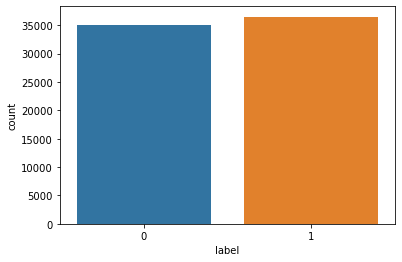

In [9]:
# Counting with plot both labels
sns.countplot(x="label", data=news_df)

In [11]:
count = news_df["title"].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:       39
10 words:    8834
11 words:    8110
12 words:    6945
13 words:    6219
14 words:    5561
15 words:    4890
16 words:    3734
17 words:    2623
18 words:    1778
19 words:    1151
2 words:      104
20 words:     932
21 words:     665
22 words:     519
23 words:     402
24 words:     274
25 words:     155
26 words:     206
27 words:      95
28 words:     100
29 words:      81
3 words:      183
30 words:      64
31 words:      36
32 words:      36
33 words:      34
34 words:      17
35 words:      18
36 words:      11
37 words:       6
38 words:       9
39 words:       4
4 words:      355
40 words:       1
41 words:       6
42 words:       7
43 words:       1
49 words:       1
5 words:      741
53 words:       2
58 words:       1
6 words:     1307
7 words:     2619
72 words:       1
8 words:     5066
9 words:     7594
Name: title, dtype: int64

1    1
Name: label, dtype: int64


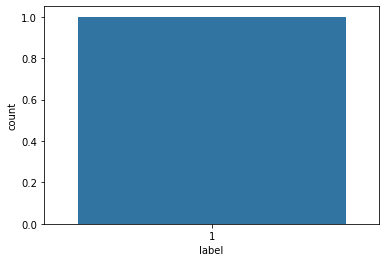

In [62]:
less = news_df.loc[news_df["title"].str.len() < 3]
sns.countplot(x="label", data=less)
print(less["label"].value_counts())

1    743
0      1
Name: label, dtype: int64


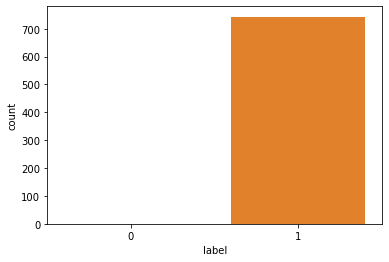

In [60]:
less_text = news_df.loc[news_df["text"].str.len() < 3]
sns.countplot(x="label", data=less_text)
print(less["label"].value_counts())

In [61]:
less_text

,title,text,label
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
325,Ohio State University Student Says Terrorist A...,,1
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1
...,...,...,...
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1
